# DengAI: Predicting Disease Spread
### HOSTED BY DRIVENDATA

### Clustering Notebook

Competition website:
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

data dictionary:
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/#features_list

In [1]:
# main libraries
import numpy  as np
import pandas as pd

# plots libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# to show all of columns name on pandas dataframe
pd.set_option('display.max_columns', None)

In [2]:
# data import
df = pd.read_csv('dengue_features_train.csv')
df_labels = pd.read_csv('dengue_labels_train.csv')

In [3]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
df_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [6]:
# remove columns that say about the location and frequency of time
df.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1, inplace=True)

In [7]:
# remove columns with practically constant values
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(
    threshold=0.03)  # 0.03 indicates 97% of observations

sel.fit(df)

sum(sel.get_support())

16

In [8]:
# select columns to keep
features_to_keep = df.columns[sel.get_support()]

In [9]:
df = df[features_to_keep]

In [10]:
# Identify columns with duplicate values

def getDuplicateColumns(df):
  # source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

lista_cols_duplicadas = []
lista_cols_duplicadas = getDuplicateColumns(df)
lista_cols_duplicadas

['reanalysis_sat_precip_amt_mm']

In [11]:
df.drop(lista_cols_duplicadas, axis=1, inplace=True)

In [12]:
# function to identify missing data
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your dataframe has " + str(df.shape[1]) + " columns. "
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing values.\n")
        
        return mis_val_table_ren_columns
    
missing_values_table(df)

Your dataframe has 15 columns. There are 15 columns with missing values.



,Missing Values,% of Total Values
station_avg_temp_c,43,3.0
station_diur_temp_rng_c,43,3.0
station_precip_mm,22,1.5
station_max_temp_c,20,1.4
station_min_temp_c,14,1.0
precipitation_amt_mm,13,0.9
reanalysis_air_temp_k,10,0.7
reanalysis_avg_temp_k,10,0.7
reanalysis_dew_point_temp_k,10,0.7
reanalysis_max_air_temp_k,10,0.7


In [13]:
# Replace missing values with median
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy='median')

imp_median.fit(df)
df_values = imp_median.transform(df)

In [14]:
type(df_values)

numpy.ndarray

In [15]:
# return the data to the data frame format to facilitate manipulation
df = pd.DataFrame(df_values, columns=df.columns)

# ... and create a new data set with the dengue case count
df_cases = df.copy()
df_cases['total_cases'] = df_labels['total_cases']

In [16]:
# arrange the data in the same scale pattern
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [17]:
# generate several clusters to check the inertia value
from sklearn.cluster import KMeans

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'random', n_init = 30, algorithm = 'full', random_state = 42)
    kmeans.fit_predict(X)
    print('Inércia obtida de {} para K = {}'.format(kmeans.inertia_, k))

Inércia obtida de 15339.247424697649 para K = 2
Inércia obtida de 10659.5131563001 para K = 3
Inércia obtida de 8965.562616687297 para K = 4
Inércia obtida de 8153.575953267195 para K = 5
Inércia obtida de 7453.062112255731 para K = 6
Inércia obtida de 6888.190345667314 para K = 7
Inércia obtida de 6433.014732558366 para K = 8
Inércia obtida de 6167.68556525204 para K = 9
Inércia obtida de 5808.618435878443 para K = 10


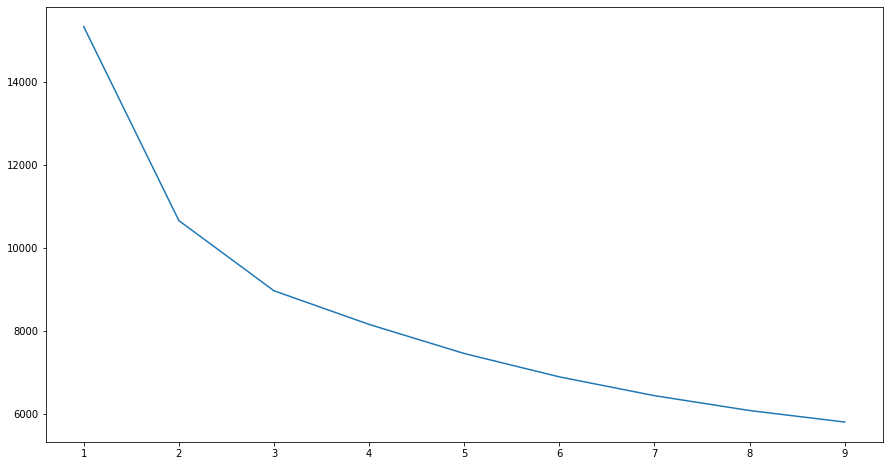

In [18]:
# confront inertia with the number of clusters
kmeans_per_k = [KMeans(n_clusters=k, n_init = 30, random_state=42).fit(X) for k in range(2, 11)]
inercias     = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(15, 8))
ax = sns.lineplot(x=range(1,10), y=inercias)

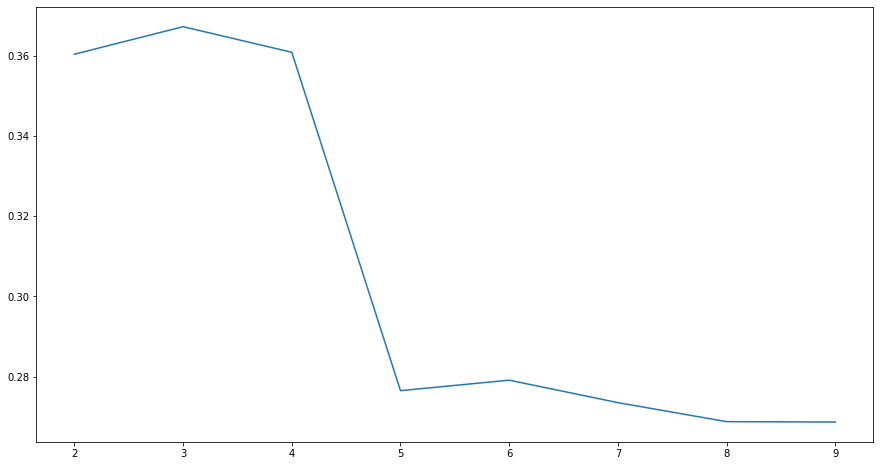

In [19]:
# confront the silhouette score with the number of groupings

from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(15, 8))
ax = sns.lineplot(x=range(2, 10), y=silhouette_scores)

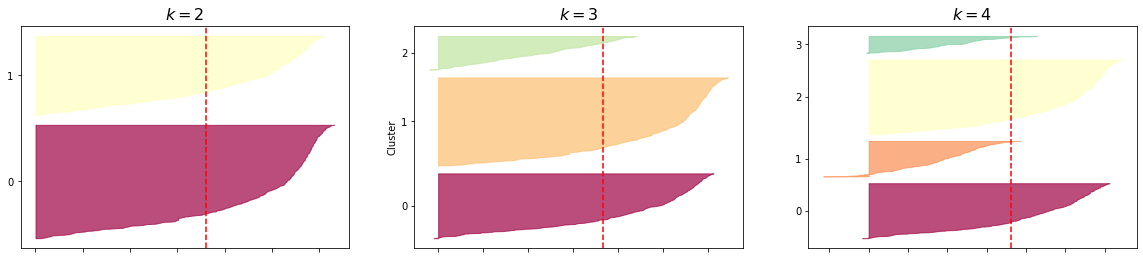

In [20]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(20, 9))

for k in (2, 3, 4):
    plt.subplot(2, 3, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [21]:
# train the model with k = 2 and analyze the data
k = 2
kmeans_2 = KMeans(n_clusters = k, init = 'random', n_init = 30, algorithm = 'full', random_state = 42)
    
pred_k2  = kmeans_2.fit_predict(X)
df_cases['cluster'] = pred_k2

In [22]:
# proportion of the clusters
df_cases.cluster.value_counts()

1    935
0    521
Name: cluster, dtype: int64

In [23]:
# aggregations for k = 2
df_cases_agg = df_cases.groupby('cluster').agg('mean')
df_cases_agg.reset_index(inplace=True)

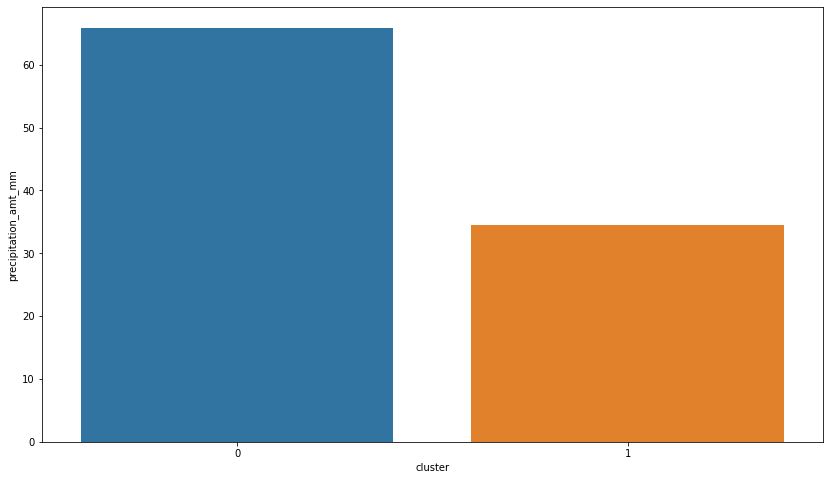

In [24]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='cluster', y='precipitation_amt_mm', data=df_cases_agg)

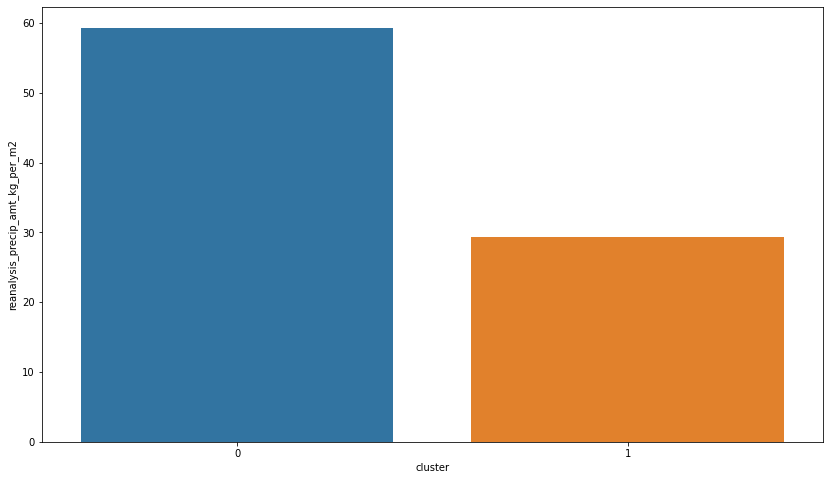

In [25]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='cluster', y='reanalysis_precip_amt_kg_per_m2', data=df_cases_agg)

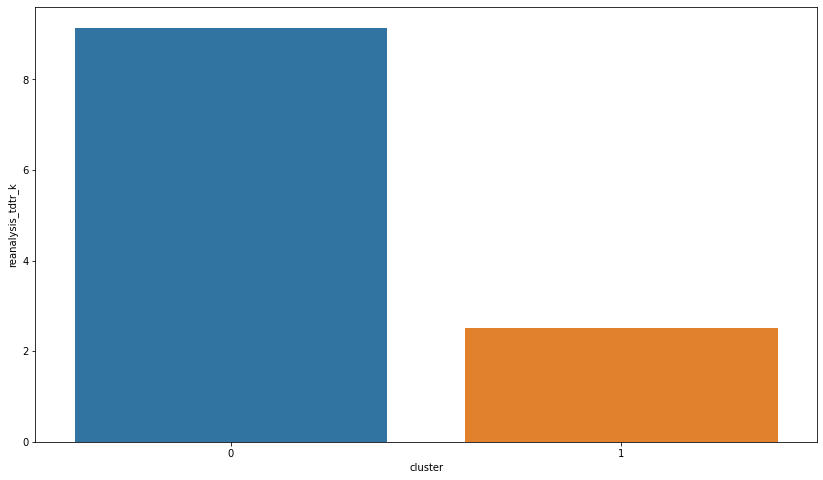

In [26]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='cluster', y='reanalysis_tdtr_k', data=df_cases_agg)

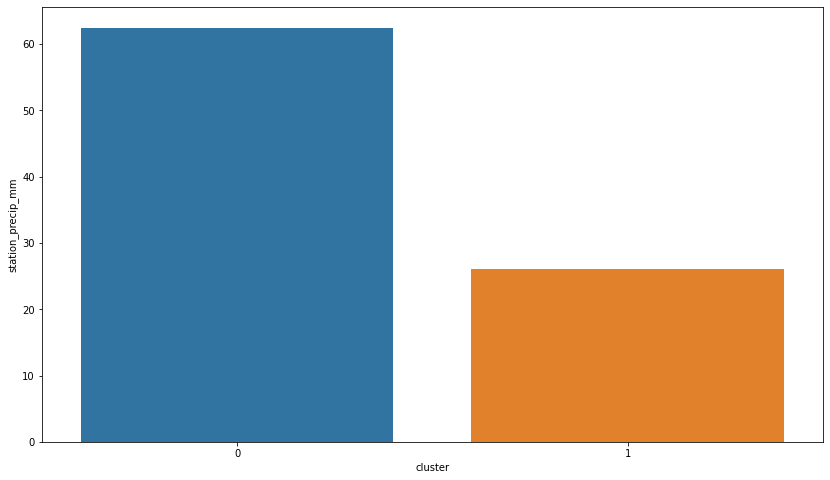

In [27]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='cluster', y='station_precip_mm', data=df_cases_agg)

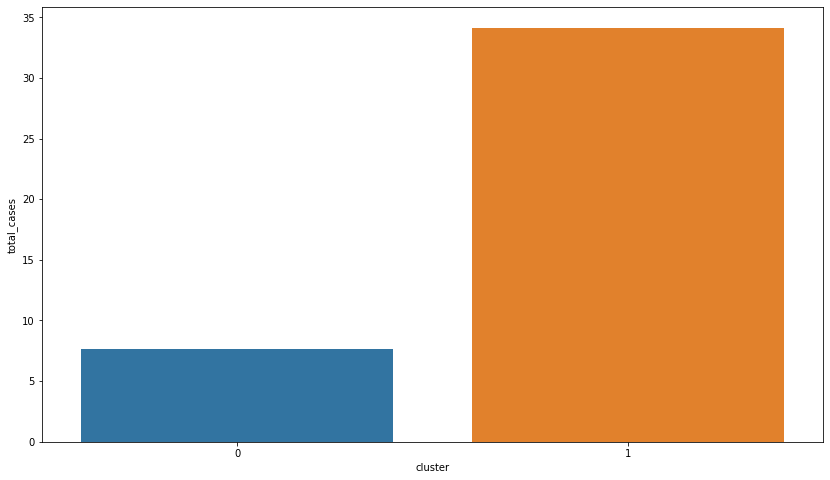

In [28]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='cluster', y='total_cases', data=df_cases_agg)

In [29]:
# Reduce dimensionality to generate the 2D plot
pca = PCA(n_components = 2).fit(X)

# Fit
pca_2d = pca.transform(X)

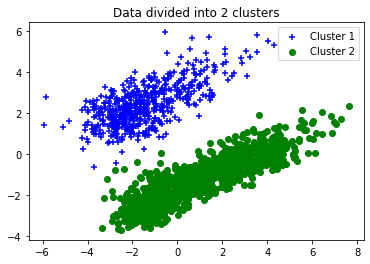

In [30]:
# show plot
for i in range(0, pca_2d.shape[0]):
    if kmeans_2.labels_[i]   == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '+')
    elif kmeans_2.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')

plt.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
plt.title('Data divided into 2 clusters')

plt.show()

In [31]:
# using DBSCAN
from sklearn.cluster import DBSCAN

dbscan_v1 = DBSCAN()

# Fit
dbscan_v1.fit(X)

# Labels
unique, counts = np.unique(dbscan_v1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  -1 1441]
 [   0    5]
 [   1   10]]


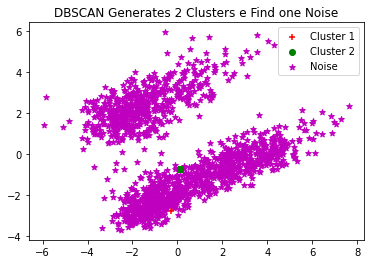

In [32]:
# Plot
for i in range(0, pca_2d.shape[0]):
    if dbscan_v1.labels_[i]   == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif dbscan_v1.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif dbscan_v1.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'm', marker = '*')

plt.legend([c1, c2, c3], 
           ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN Generates 2 Clusters e Find one Noise')
plt.show()

In [33]:
# using MeanShift
from sklearn.cluster import MeanShift

meanShift = MeanShift()

meanShift.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [34]:
# Collect labels, centroid and number of clusters
labels          = meanShift.labels_
cluster_centers = meanShift.cluster_centers_
n_clusters_     = len(np.unique(labels))

print("Estimated Number of Clusters:", n_clusters_)
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

Estimated Number of Clusters: 3
[[   0 1441]
 [   1    3]
 [   2   12]]


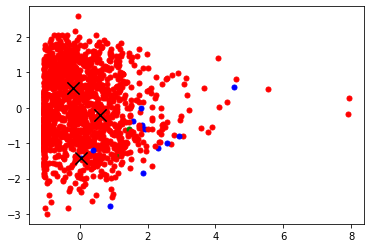

In [35]:
# Plot

colors = 10*['r.','g.','b.','c.','k.','y.','m.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = "x", color = 'k', s = 150, linewidths = 5, zorder = 10)
plt.show()

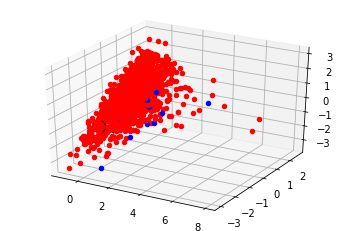

In [36]:
# Plot 3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
colors = 10*['r','g','b','c','k','y','m']

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c = colors[labels[i]], marker = 'o')

ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2],
           marker = "x",
           color = 'k', 
           s = 150, 
           linewidths = 5, 
           zorder = 10)
plt.show()